# Import

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

# Preprocess the data

Dans un premier temps, on charge à nouveau le dataset contenant les données sur les prix d'avion.

In [2]:
# Charger le fichier Clean_Dataset.csv dans une variable df


In [3]:
# Afficher les premières lignes


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956


Il est l'heure de commencer à utiliser sklearn !

Pour débuter, nous allons diviser notre dataset en une partie dédiée à l'entrainement et une partie au test.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
df = df.sample(frac=1).reset_index(drop=True) # Mélange le dataset

# train_test_split permet de découper un dataset en deux sous dataset
# Créer une variable train_set et une variable test_set grâce à train_test_split()
# /!\ On veut une partie de test représentant 20% de notre dataset complet
# Si l'on veut reproduire des résultats identiques à ceux qui suivent, on pourra spécifier l'argument random_state=0



In [6]:
# Ecrire une fonction 'encode_stops()' convertissant la colonne 'stops' en colonne numérique tel que 'zero' devienne 0,
# 'one' devienne 1 et 'two_or_more' devienne 2.


In [7]:
# Ecrire une fonction 'encode_flight()' retirant la partie numérique de la colonne 'flight' afin de garder
# uniquement les deux premières lettres


In [8]:
def encoder(df):
    df = encode_stops(df)
    df = encode_flight(df)
    
    X = df.drop('price', axis=1)
    y = df['price']
    
    print(f"Target mean = {round(y.mean())}")
    
    return X, y

In [9]:
X, y = encoder(df)

Target mean = 20890


In [10]:
X_train, y_train = encoder(train_set)

Target mean = 20890


In [11]:
X_test, y_test = encoder(test_set)

Target mean = 20889


# Créer le modèle

Une partie importante d'un projet de machine learning consiste à choisir un modèle qui convient au problème que l'on est en train de traiter. Scikit-learn a créé un organigramme qui peut vous aider à faire un premier choix :

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

Pour répondre à notre cas d'usage, on pourra utiliser un SGDRegressor qui va nous permettre d'utiliser l'algorithme de descente de gradient stochastique sur un modèle linéaire. 

In [ ]:
# On importe plusieurs outils qui vont nous servir à créer notre modèle
from sklearn.preprocessing import RobustScaler, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.linear_model import SGDRegressor

Avant d'entrainer un modèle de machine learning, il y a généralement deux transformations à effectuer sur nos données :
- Normaliser nos variables quantitatives
- Encoder nos variables qualitatives

Pour se faire, nous allons créer une pipeline qui va automatiser les différentes transformations que nous voulons réaliser. 

En l'occurence, on utilisera un RobustScaler() sur nos données quantitatives et un OneHotEncoder() sur nos données qualitatives. 

- RobustScaler permet de mettre les données à l'échelle en fonction de l'écart interquartile (il supprime ainsi les outliers).

- OneHotEncoder transforme les données qualitatives en une matrice creuse comme dans l'image ci-dessous :
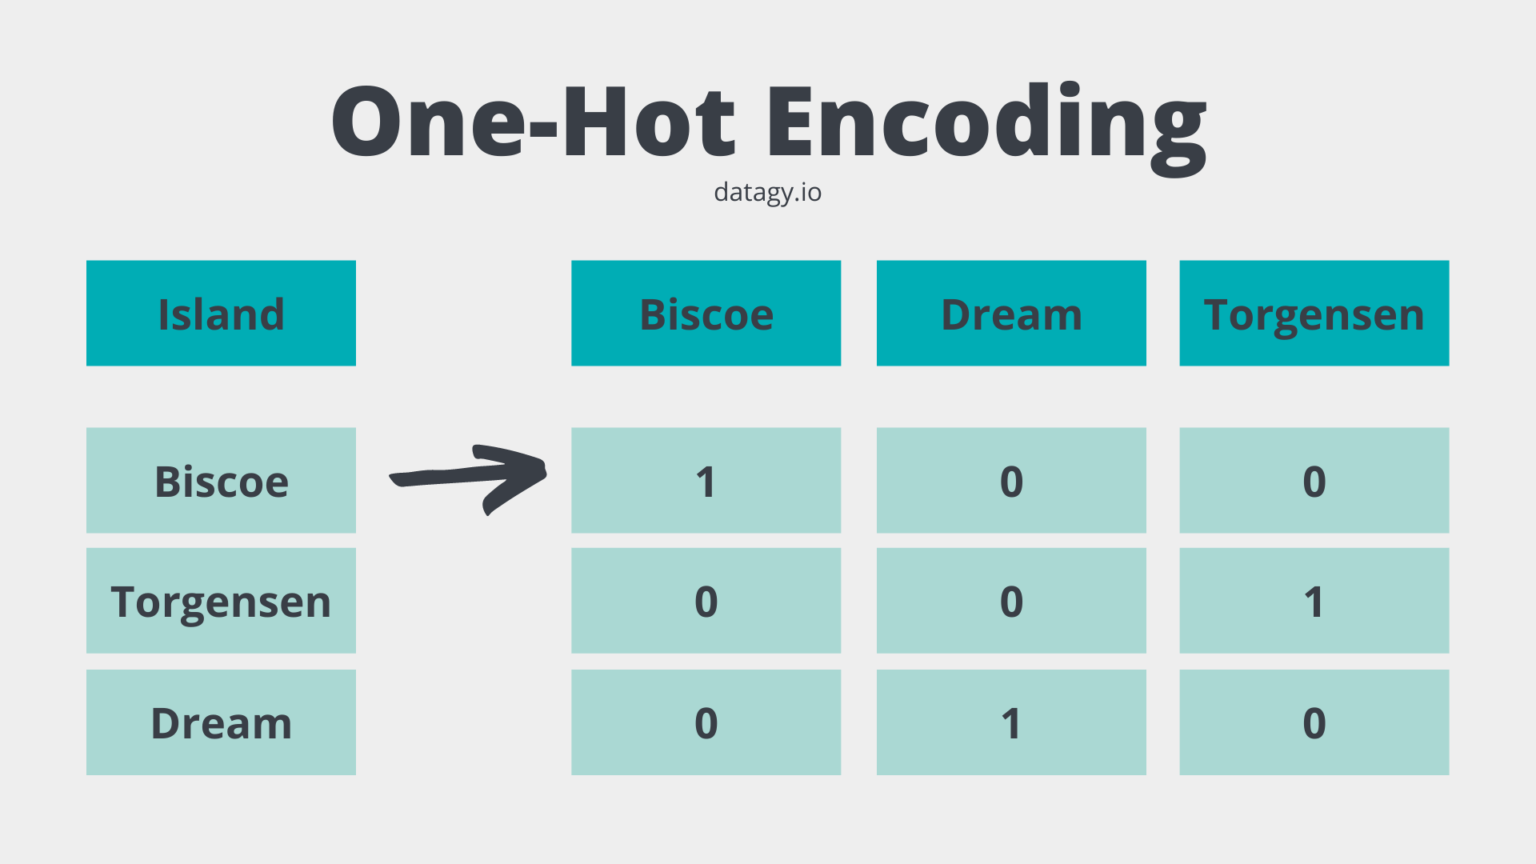

In [ ]:
# Dans un premier temps, on sépare nos features quantitatives et qualitatives
numerical_features = make_column_selector(dtype_include = np.number)
categorical_features = make_column_selector(dtype_exclude = np.number)

# Puis on définit les transformations que l'on va effectuer
numerical_pipeline = make_pipeline(RobustScaler())
categorical_pipeline = make_pipeline(OneHotEncoder())

# On applique ensuite les transformations aux données
preprocessor = make_column_transformer((numerical_pipeline, numerical_features), 
                                       (categorical_pipeline, categorical_features))

# Enfin, on associe notre preprocessor au modèle de notre choix
model = make_pipeline(preprocessor, SGDRegressor())

In [ ]:
# Adapter le code ci-dessus afin de créer une fonction prenant un modèle en entrée 
# et retournant une pipeline comprenant l'ensemble des étapes de transformation
def create_model(model):


In [ ]:
model = create_model(SGDRegressor())

In [15]:
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C1CA275310>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C1CA275370>)])),
                ('sgdregressor', SGDRegressor())])

# Entrainement et prédiction

In [16]:
# Utiliser la méthode .fit() pour entrainer le modèle sur X_train et y_train

# Créer une variable 'ypred' grâce à la méthode .predict() sur X_test


In [17]:
ypred

array([ 7704.57815517, 49720.79210445, 52229.62830894, ...,
        6430.61051459,  7183.22441961,  8276.83919175])

# Evaluation

Une fois notre modèle entrainé, nous allons chercher à évaluer ses performances.

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
# Afficher la mean_squared_error


7019.086397695067

L'erreur moyenne reste relativement élevée.

In [20]:
# Afficher le score r2


0.9044856655149963

Le score R2 est  le rapport de la variance expliquée par la régression sur la variance totale. Notre modèle explique bien la variance des données. 

On peut aussi regarder la MSE avec une méthode de cross validation qui nous donnera une meilleure idée des performances de notre modèle.

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
# L'argument 'cv' (cross validation) représente le nombre de découpe dans le dataset et donc le nombre d'itérations d'entrainement
# Il faut préciser l'argument 'scoring' afin d'afficher la MSE
# On pourra utiliser 'X' et 'y' au lieu de 'X_train' et 'y_train' car la cross validation va découper
# d'elle même le dataset en partie de training et de test


In [23]:
# Créer une fonction 'display_scores' qui affiche les scores de la cross validation ainsi que la moyenne et l'écart type


In [24]:
display_scores(scores)

Scores : [7004.06360356 6993.43759632 7116.92118049 7033.65869324 7067.76975094
 7037.06627947 7028.62647595 7068.30562749 6950.38973353 6969.90793061]
Mean : 7027.014687161743
Standard deviation : 47.311318030353945


### Learning curve

On peut désormais afficher les courbes d'apprentissages afin de voir à quel point notre modèle est capable de généraliser aux données qu'il n'a jamais vu.

Cela nous permettra aussi de voir si récolter davantages de données pourrait nous aider à améliorer les performances de notre modèle.

In [25]:
from sklearn.model_selection import learning_curve

In [28]:
# On sélectionne un échantillon des données afin d'accélérer l'entrainement
# Vous pouvez simplement exécuter cette cellule
model = create_model(SGDRegressor())
df = pd.read_csv('Clean_Dataset.csv').drop(columns="Unnamed: 0")
df_sample = df.sample(frac=0.03, random_state=4) 
X_sample, y_sample = encoder(df_sample)

Target mean = 20574
(9005, 11)


In [29]:
# Utiliser la fonction 'learning_curve' sur X_sample et y_sample
# Pour répliquer les mêmes résultats : spécifier 'random_state=10'


In [26]:
# Ecrire une fonction qui affiche les courbes d'apprentissage
def plot_learning_curve(N, train_score, val_score, model_name):


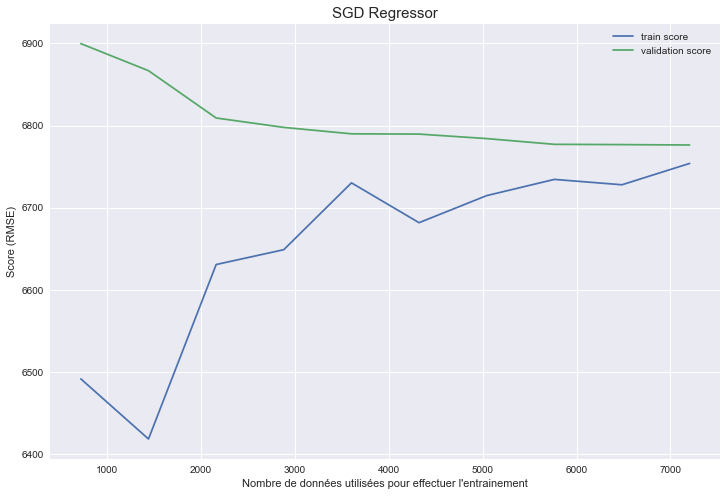

In [30]:
plot_learning_curve(N, train_score, val_score, 'SGD Regressor')

Essayons d'interpréter ces courbes. On peut observer que l'erreur sur le jeu d'entrainement est faible lorsque le modèle est entrainé sur un petit nombre de données. Cependant l'erreur augmente rapidement avec le nombre de données utilisées et semble  atteindre un plateau. Au contraire, l'erreur sur le jeu de validation reste gloabalement haute tout le temps et ne diminue que peut avec l'augmentation des données. 

La brutale augmentation de l'erreur d'entrainement et la faible diminution de l'erreur de validation semble nous indiquer que notre modèle est en état de sous ajustement. Notre modèle n'est pas suffisament complexe pour modéliser la complexité des données. Dans ce cas, ajouter de nouvelles données à notre modèle n'améliorerait probablement pas les performances.
Les solutions qui s'offrent à nous sont les suivantes :

- Utiliser d'autres modèles plus complexes
- Complexifier nos données en créant de nouvelles variables ou en créant des variables plus pertinentes

# Essayer plusieurs modèles

Attention, cette partie peut mettre beaucoup de temps à s'exécuter. On peut réduire l'argument frac de la méthode df.sample() pour accélérer l'entrainement.

In [57]:
from sklearn.svm import SVR

In [58]:
# Vous pouvez simplement exécuter cette cellule 
df = pd.read_csv('Clean_Dataset.csv').drop(columns="Unnamed: 0")
df_sample = df.sample(frac=0.01, random_state=4) # sampling to accelerate the training
X_sample, y_sample = encoder(df_sample)

In [60]:
LinearSVR = create_model(SVR(kernel='linear'))
RBFSVM = create_model(SVR(kernel='rbf'))

dict_of_models = {'LinearSVR' : LinearSVR, 
                  'RBFSVM' : RBFSVM}

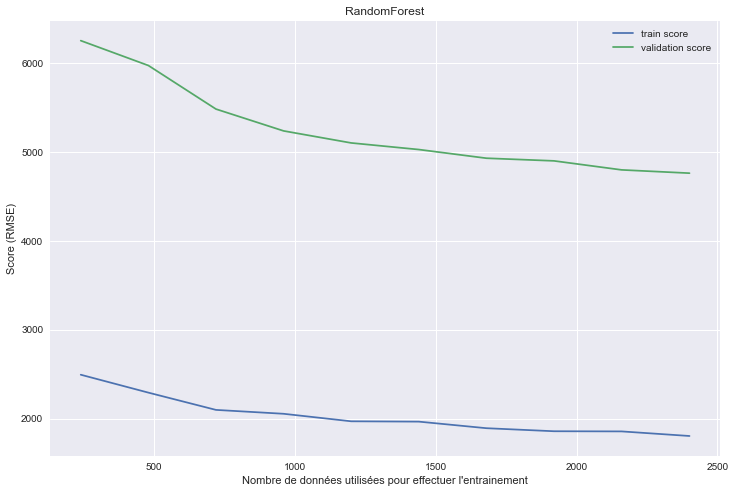

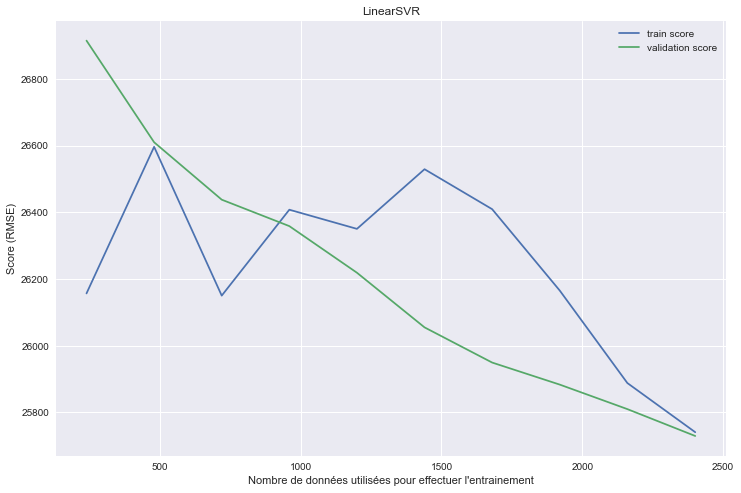

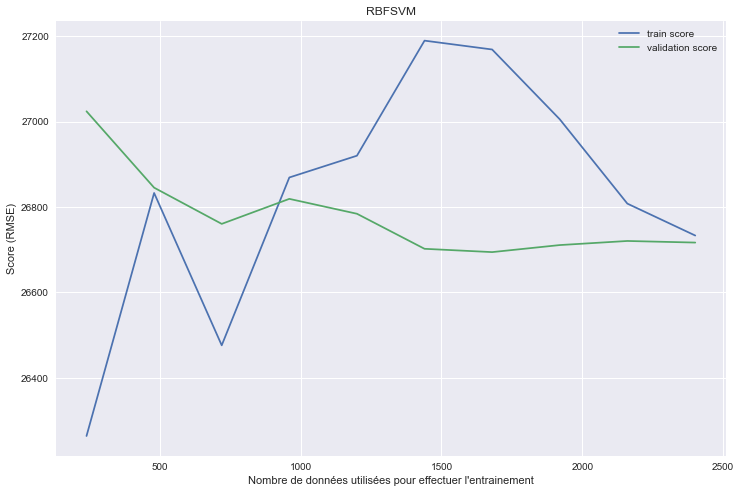

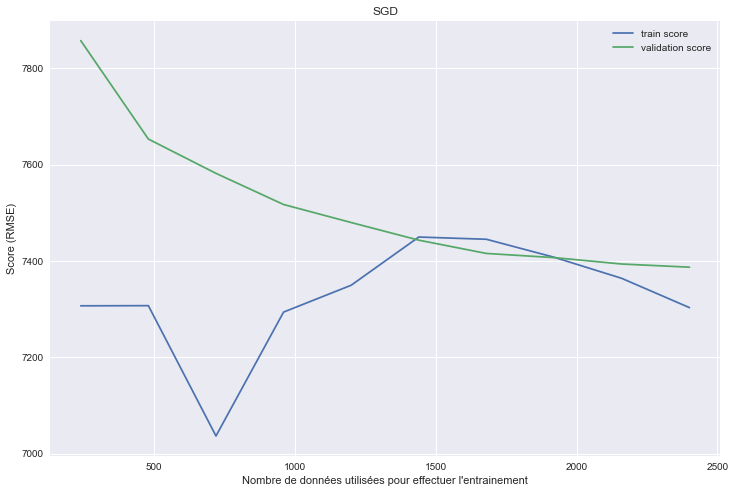

In [31]:
for name, model in dict_of_models.items():
    
    N, train_score, val_score = learning_curve(model, X_sample, y_sample, 
                                               cv = 5, 
                                               train_sizes = np.linspace(0.1, 1, 10), 
                                               scoring='neg_root_mean_squared_error',
                                               random_state=0)
    plot_learning_curve(N, train_score, val_score, name)

On peut voir que les autres modèles que nous avons utiliser se débrouillent beaucoup moins bien que notre modèle de descente de gradient stochastique. Par conséquent, nous allons garder ce modèle et tenter de complexifier nos données afin d'obtenir de meilleurs résultats.

# Polynomial Features

In [31]:
from sklearn.preprocessing import PolynomialFeatures

Afin de complexifier notre modèle, nous allons rajouter à nos données l'ensemble des combinaisons polynomiales de nos différentes colonnes à un degré défini. Par exemple, si nous avons les colonnes a et b, alors PolynomialFeatures(degree=2) générera les colonnes a, b, a\*b, a\*\*2 et b\*\*2

In [32]:
# Reprendre la fonction create_model() et rajouter une étape de PolynomialFeatures() dans numerical_pipeline 
# et categorical_pipeline
def create_polynomial_model(model, degree):


In [33]:
model = create_polynomial_model(SGDRegressor(), degree=3)

In [34]:
# Vous pouvez simplement exécuter cette cellule 
df = pd.read_csv('Clean_Dataset.csv').drop(columns="Unnamed: 0")
df_sample = df.sample(frac=0.08, random_state=4) # sampling to accelerate the training
X_sample, y_sample = encoder(df_sample)
print(df_sample.shape)

Target mean = 20879
(24012, 11)


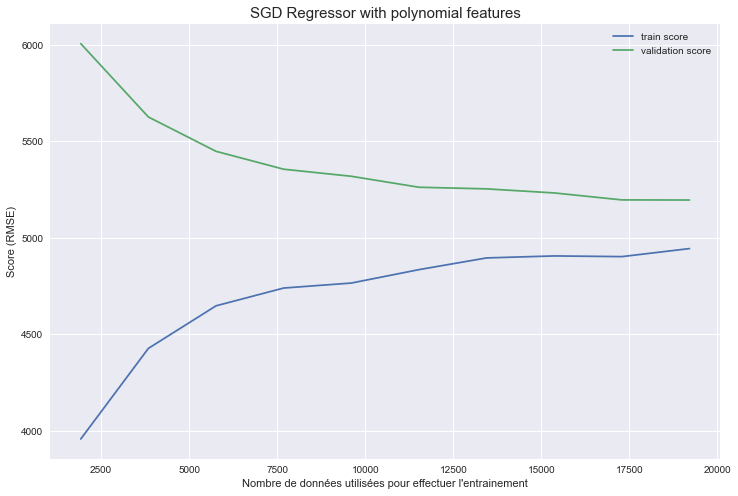

In [36]:
# Générer et tracer les courbes d'apprentissage du nouveau modèle polynomial
# Pour répliquer les mêmes résultats : spécifier 'random_state=10'
# L'entrainement peut prendre du temps en raison du plus grand nombre de features



Les résultats obtenus sont intéressants. Pour mieux les comprendre, on peut tracer quelques informations complémentaires :

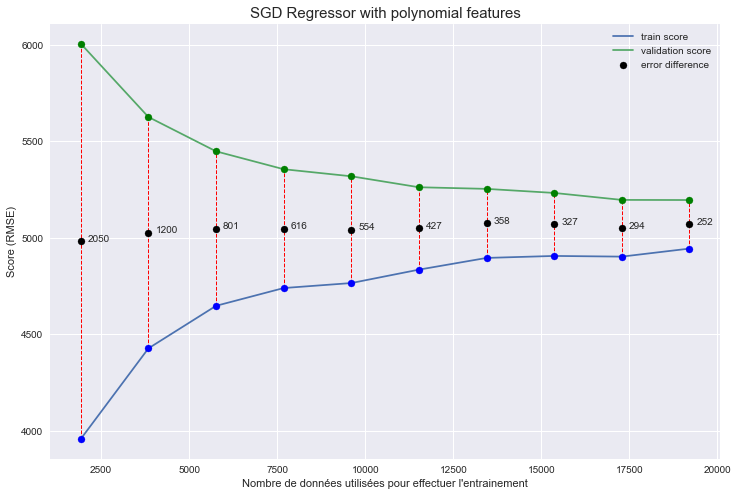

In [37]:
plot_learning_curve(N, train_score, val_score, 'SGD Regressor with polynomial features')

train_score_mean = np.absolute(train_score.mean(axis=1))
val_score_mean = np.absolute(val_score.mean(axis=1))
difference_score = val_score_mean - train_score_mean

my_label = "error difference"
for i, train_val in enumerate(zip(train_score_mean, val_score_mean)):
    plt.plot([N[i], N[i]], [train_val[0], train_val[1]], ls='--', c='r', lw=1)
    plt.scatter(N[i], train_val[0], c='b', zorder=2)
    plt.scatter(N[i], train_val[1], c='g', zorder=2)
    plt.scatter(N[i], train_val[1] - (difference_score[i]/2), c='black', zorder=2, label=my_label)
    plt.annotate(str(round(difference_score[i])),xy=(N[i]+200, train_val[1] - (difference_score[i]/2)-1))
    my_label = "_nolegend_"

plt.legend()
plt.show()

- On peut observer que les performances de notre modèle sont meilleures : on passe d'une erreur d'environ 6750 à 5100.

- Cependant, on peut observer un écart plus important entre les deux courbes. En effet, le modèle performe mieux sur les données d'entrainement. Notre modèle est désormais dans un cas de sur-ajustement (overfitting) ! Pour régler ce problème, on pourrait récolter davantage de données ou bien utiliser des techniques de régularisation qui pénalisent notre modèle et permettent d'éviter le sur-ajustement. 

SGDRegressor contient un argument penalty qui permet d'appliquer une régularisation. Par défaut sa valeur est réglée sur "l2". Mais on peut aussi essayer les pénalités "l1" et "elasticnet" pour voir si elles permettent de réduire l'overfitting. On peut aussi augmenter l'argument "alpha" qui multiplie l'effet de la régularisation (sa valeur par défaut est 0.0001). 

In [38]:
model = create_polynomial_model(SGDRegressor(alpha=0.01), degree=3) # On augmente le terme alpha

In [39]:
N, train_score, val_score = learning_curve(model, X_sample, y_sample, 
                                           cv = 5, 
                                           train_sizes = np.linspace(0.1, 1, 10), 
                                           scoring='neg_root_mean_squared_error',
                                           random_state=10)

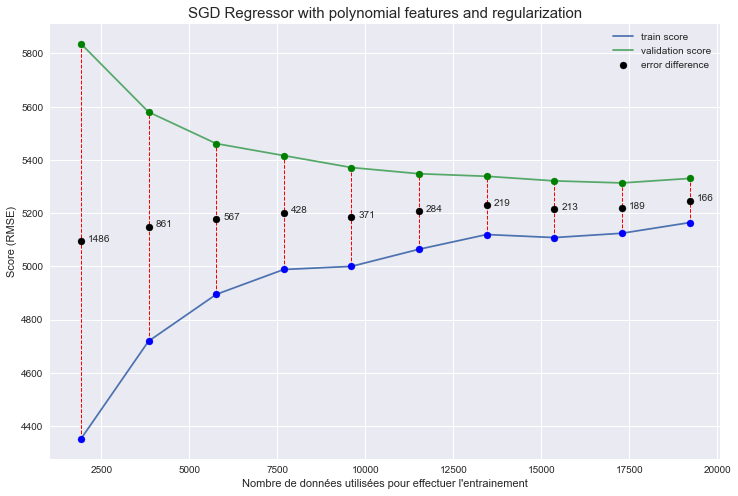

In [40]:
plot_learning_curve(N, train_score, val_score, 'SGD Regressor with polynomial features and regularization')

train_score_mean = np.absolute(train_score.mean(axis=1))
val_score_mean = np.absolute(val_score.mean(axis=1))
difference_score = val_score_mean - train_score_mean

my_label = "error difference"
for i, train_val in enumerate(zip(train_score_mean, val_score_mean)):
    plt.plot([N[i], N[i]], [train_val[0], train_val[1]], ls='--', c='r', lw=1)
    plt.scatter(N[i], train_val[0], c='b', zorder=2)
    plt.scatter(N[i], train_val[1], c='g', zorder=2)
    plt.scatter(N[i], train_val[1] - (difference_score[i]/2), c='black', zorder=2, label=my_label)
    plt.annotate(str(round(difference_score[i])),xy=(N[i]+200, train_val[1] - (difference_score[i]/2)-1))
    my_label = "_nolegend_"

plt.legend()
plt.show()

On peut observer que l'écart entre les deux courbes s'est réduit. Notre nouveau modèle parvient donc mieux à généraliser à des données qu'il n'a jamais vu. Pour continuer d'améliorer les performances de notre modèle, nous pourrions chercher à optimiser les hyperparamètres de ce dernier, c'est ce que nous verrons dans le prochain notebook.

# Sauvegarder notre modèle

In [122]:
pip install joblib

In [41]:
import joblib

In [42]:
# Enregistrer
joblib.dump(model, 'model.pkl')

['model.pkl']